<a href="https://colab.research.google.com/github/Frank-Muzi/School-practice/blob/main/Perceptron_Lab_exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction for new book [3, 2]: -1
Errors per epoch: [2, 1, 2, 1, 1, 1, 0, 0, 0, 0]


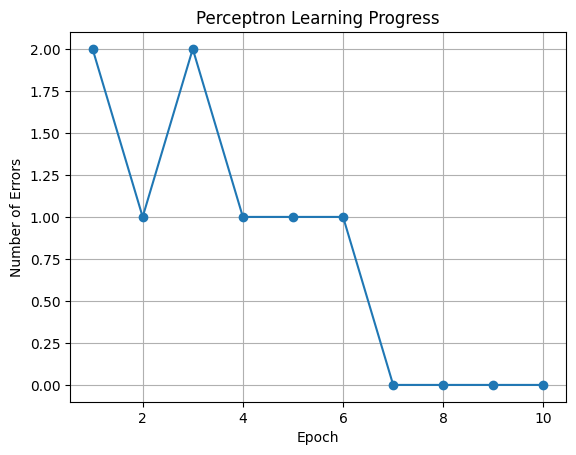

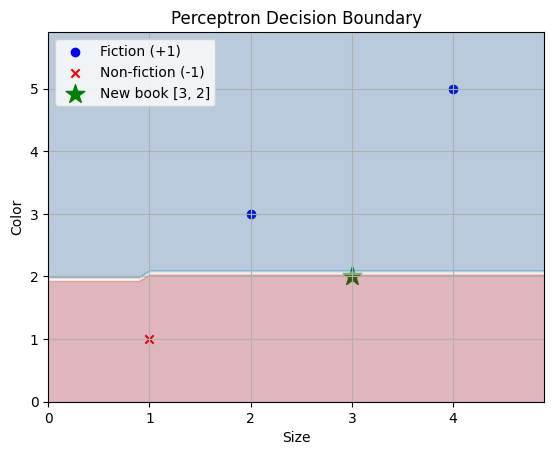

Prediction for new flower [4.0, 1.0]: [1]
Errors per epoch: [2, 2, 0, 0, 0, 0, 0, 0, 0, 0]
eta=0.01, n_iter=20
Prediction for [3,2]: -1
Errors per epoch: [2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


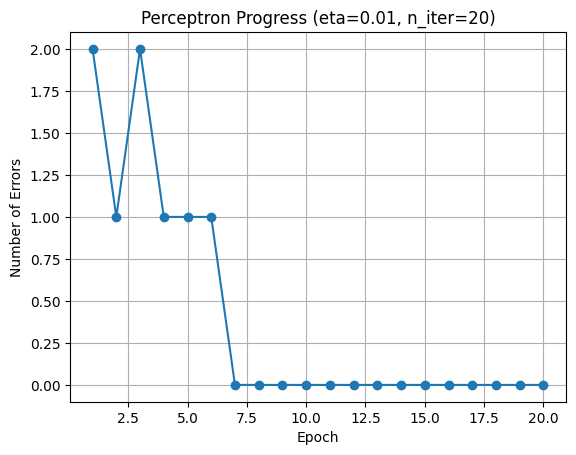


eta=0.5, n_iter=5
Prediction for [3,2]: 1
Errors per epoch: [2, 1, 2, 1, 1]


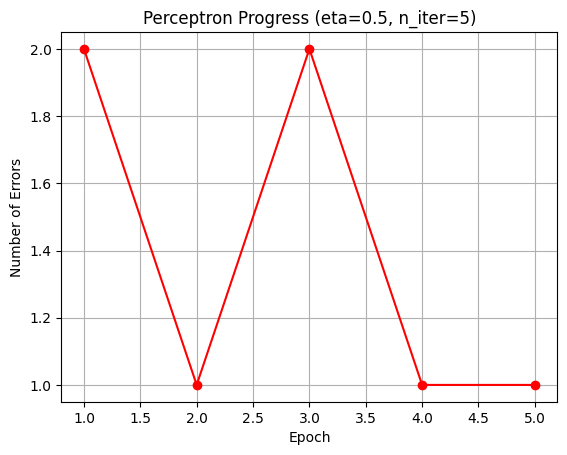

Prediction for new flower [4.0, 1.0]: [1]
Errors per epoch: [2, 2, 0, 0, 0, 0, 0, 0, 0, 0]


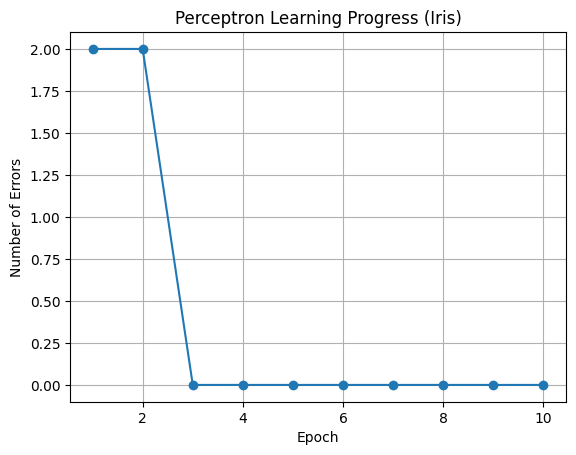

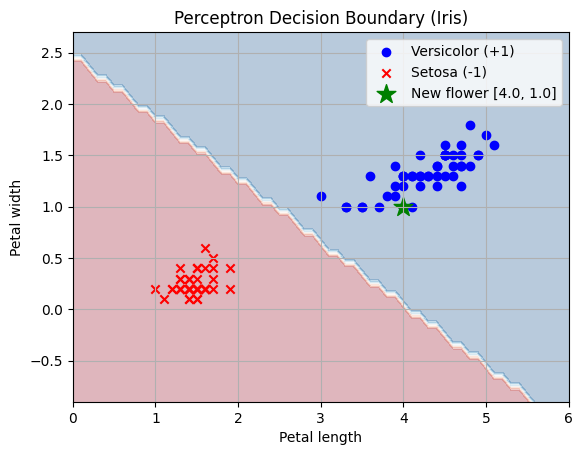

In [11]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data."""
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

X = np.array([[2, 3], [1, 1], [4, 5]])  # Features: size, color
y = np.array([1, -1, 1])  # Labels: fiction (+1), non-fiction (-1)
model = Perceptron(eta=0.1, n_iter=10)
model.fit(X, y)
print("Prediction for new book [3, 2]:", model.predict(np.array([3, 2])))
print("Errors per epoch:", model.errors_)

#Answering questions.
#1 The prediction of -1 means the model classifies the book [3, 2] as non-fiction.
#2 The errors per epoch are like [2, 1, 2, 1, 1, 1, 0, 0, 0, 0] which is 8 errors in total.
#3 The perceptron has found the data flow and classified correclty in the epoch.

import matplotlib.pyplot as plt
plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Perceptron Learning Progress')
plt.grid(True)
plt.show()

#Answering questions.
#1 The perceptron is still adjusting the data weight until it find all points correctly.
#2 The perceptron has found a decision boundry that perfectly separate the fuction(+1) and non fuction(-1) books in the dataset.

import matplotlib.pyplot as plt

# Plot data points
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='o', label='Fiction (+1)')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='x', label='Non-fiction (-1)')
plt.scatter([3], [2], color='green', marker='*', s=200, label='New book [3, 2]')

# Plot decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='RdBu')
plt.xlabel('Size')
plt.ylabel('Color')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

#Answering questions
#1 The new book [3,2] lies just below the decision boundary, placing it in the non-fiction region
#2 The boundary forms a line that places the fiction books above it and non-fiction books below it.
#3 If you move the new book to [4,4], the book would be above the boundary, so the perceptron would predict it as fiction.

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:100, [2, 3]]  # Petal length, petal width (first 100 samples: Setosa and Versicolor)
y = iris.target[:100]  # 0 for Setosa, 1 for Versicolor
y = np.where(y == 0, -1, 1)  # Convert to -1 and 1 for Perceptron
model = Perceptron(eta=0.1, n_iter=10)
model.fit(X, y)
print("Prediction for new flower [4.0, 1.0]:", model.predict(np.array([[4.0, 1.0]])))
print("Errors per epoch:", model.errors_)

#Slower learning
model1 = Perceptron(eta=0.01, n_iter=20, random_state=1)
model1.fit(np.array([[2, 3], [1, 1], [4, 5]]), np.array([1, -1, 1]))
print("eta=0.01, n_iter=20")
print("Prediction for [3,2]:", model1.predict(np.array([3, 2])))
print("Errors per epoch:", model1.errors_)

plt.plot(range(1, len(model1.errors_) + 1), model1.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Perceptron Progress (eta=0.01, n_iter=20)')
plt.grid(True)
plt.show()

#Faster learning
model2 = Perceptron(eta=0.5, n_iter=5, random_state=1)
model2.fit(np.array([[2, 3], [1, 1], [4, 5]]), np.array([1, -1, 1]))
print("\neta=0.5, n_iter=5")
print("Prediction for [3,2]:", model2.predict(np.array([3, 2])))
print("Errors per epoch:", model2.errors_)

plt.plot(range(1, len(model2.errors_) + 1), model2.errors_, marker='o', color='red')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Perceptron Progress (eta=0.5, n_iter=5)')
plt.grid(True)
plt.show()

#Answering questions
#1 The smallest eta learns slowly and errors drop slowly. The largest eta learns faster but can jump around.
#2 More epochs allow full learning to 0 errors while fewer epochs may stop before reaching 0.
#3 No it didn't change, the prediction stayed -1 because the boundary still placed [3,2] in the non-fiction region.

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:100, [2, 3]]  # Petal length, petal width (first 100 samples: Setosa and Versicolor)
y = iris.target[:100]  # 0 for Setosa, 1 for Versicolor
y = np.where(y == 0, -1, 1)  # Convert to -1 and 1 for Perceptron
model = Perceptron(eta=0.1, n_iter=10)
model.fit(X, y)
print("Prediction for new flower [4.0, 1.0]:", model.predict(np.array([[4.0, 1.0]])))
print("Errors per epoch:", model.errors_)

#Plot errors
plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Perceptron Learning Progress (Iris)')
plt.grid(True)
plt.show()

#Plot decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                       np.arange(x2_min, x2_max, 0.1))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='RdBu')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='o', label='Versicolor (+1)')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='x', label='Setosa (-1)')
plt.scatter([4.0], [1.0], color='green', marker='*', s=200, label='New flower [4.0, 1.0]')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Perceptron Decision Boundary (Iris)')
plt.legend()
plt.grid(True)
plt.show()

#Answering questions
#1 The prediction of versicolor if a fiction since it's labeled (+1) and the Setosa is non fiction since it is label (-1).
#2 Yes it reach 0, the errors list reaches 0 because Setosa and Versicolor are linearly separable using petal length and width.
#3 On the Iris data, the decision boundary has a clean diagonal line separating the two flower classes, while in the book dataset it was a simpler line through just three points.


#What i learned

# I learned that the Perceptron slowly improves its “sorting rule” through repeated updates.
# The robot librarian practicing how to shelve books correctly,
# At the beginning it made mistakes and adjusts the rule, sometimes fixing one error but causing another.
# Over time, with enough practice (epochs), the librarian finds a clear rule (the decision boundary) that separates the categories without errors if the data is linearly separable.
# This shows how the Perceptron learns from mistakes and illustrates the core idea of machine learning.
